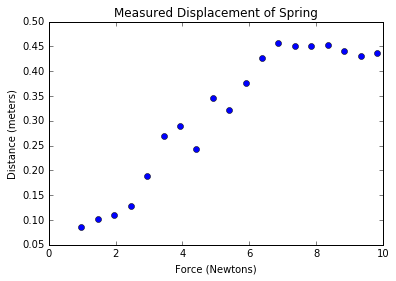

In [3]:
# Ploting data from file
%matplotlib inline
import pylab, random

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')

plotData('springData.txt')
pylab.show()

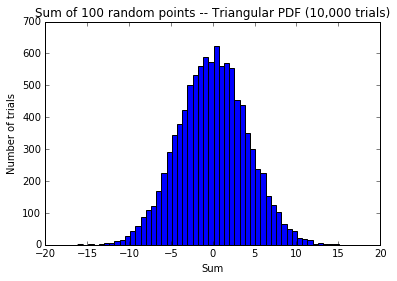

In [4]:
# Testing errors in the curve
def testErrors(ntrials=10000,npts=100):
    results = [0] * ntrials
    for i in xrange(ntrials):
        s = 0   # sum of random points
        for j in xrange(npts):
            s += random.triangular(-1,1)
        results[i] =s
    # plot results in a histogram
    pylab.hist(results,bins=50)
    pylab.title('Sum of 100 random points -- Triangular PDF (10,000 trials)')
    pylab.xlabel('Sum')
    pylab.ylabel('Number of trials')

testErrors(ntrials=10000,npts=100)
pylab.show()

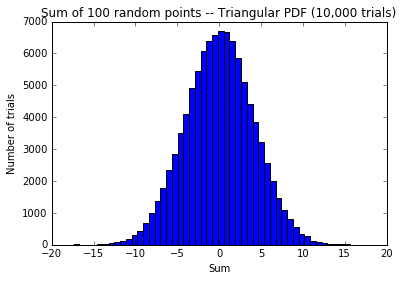

In [5]:
# Increase the number of trials
testErrors(ntrials=100000,npts=100)
pylab.show()

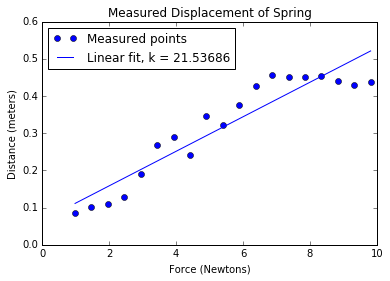

In [6]:
#Using polyfit (linear) to fit the data
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured points')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)  # fit y = ax + b
    # use line equation to graph predicted values
    estYVals = a*xVals + b
    k = 1/a
    pylab.plot(xVals, estYVals, label = 'Linear fit, k = '
               + str(round(k, 5)))
    pylab.legend(loc = 'best')

fitData('springData.txt')
pylab.show()

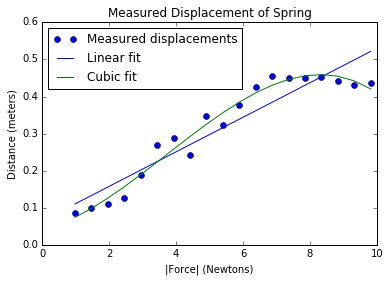

In [7]:
# Trying a cubic equation to fit the data
def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*xVals + b
    pylab.plot(xVals, estYVals, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(xVals**3) + b*xVals**2 + c*xVals + d
    pylab.plot(xVals, estYVals, label = 'Cubic fit')
    pylab.legend(loc = 'best')

fitData1('springData.txt')
pylab.show()

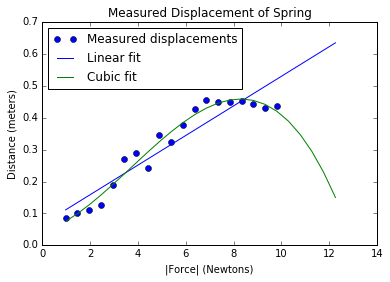

In [8]:
# Try new data in extX in order to predict the new points

def fitData2(fileName):
    xVals, yVals = getData(fileName)
    extX = pylab.array(xVals + [1.05, 1.1, 1.15, 1.2, 1.25])
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    extX = extX*9.81    # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*extX + b
    pylab.plot(extX, estYVals, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(extX**3) + b*extX**2 + c*extX + d
    pylab.plot(extX, estYVals, label = 'Cubic fit')
    pylab.legend(loc = 'best')

fitData2('springData.txt')
pylab.show()

<font color='red'>Ouch!</font> It seems that our cubic prediction does not work for values greater that our training.

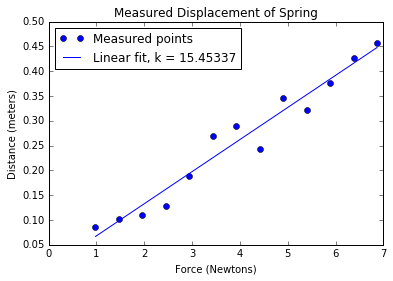

In [9]:
# Removing the last points since it appears that the spring achieved 
# its limit and stoped to work as a spring and is working like a 
# streched wired

def fitData3(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals[:-6])
    yVals = pylab.array(yVals[:-6])
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured points')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)  # fix y = ax + b
    # use line equation to graph predicted values
    estYVals = a*xVals + b
    k = 1/a
    pylab.plot(xVals, estYVals, label = 'Linear fit, k = '
               + str(round(k, 5)))
    pylab.legend(loc = 'best')

fitData3('springData.txt')
pylab.show()